### Installing libraries required

In [ ]:
!pip install transformers sentencepiece diffusers

### Generating style cues from a prompt

In [2]:
from transformers import pipeline

text_pipe = pipeline('text-generation', model='daspartho/prompt-extend', device=0)

prompt = "peaceful village landscape"
extended_prompt = text_pipe(prompt+',', num_return_sequences=1)[0]["generated_text"]
extended_prompt

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
/usr/local/lib/python3.8/dist-packages/transformers/generation/utils.py:1387: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 50 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


'peaceful village landscape, high detail, high definition, photorealistic, 8k, hdr, rtx, unreal engine 5, epic, digital painting, artstation, by Arodawa, Annie Leibovitz and Steve McCurry, gorgeous, beautiful, cinematic. breathtaking,'

### Trying the prompts with stable diffusion

#### Setting up stable diffusion

Be sure to login with a auth token for stable diffusion :)

In [ ]:
from huggingface_hub import notebook_login
from diffusers import StableDiffusionPipeline
from pathlib import Path
import torch

if not (Path.home()/'.huggingface'/'token').exists(): 
    notebook_login()

In [ ]:
sd_pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4", 
    revision="fp16", 
    torch_dtype=torch.float16,
).to("cuda")

#### Image generated using input prompt

  0%|          | 0/50 [00:00<?, ?it/s]

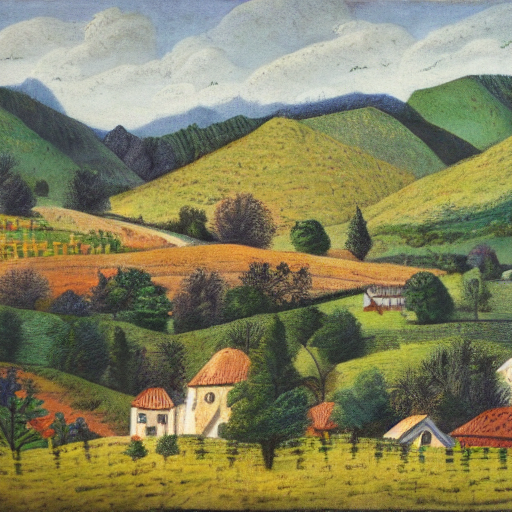

In [5]:
torch.manual_seed(32)
sd_pipe(prompt).images[0]

#### Image generated using extended prompt

  0%|          | 0/50 [00:00<?, ?it/s]

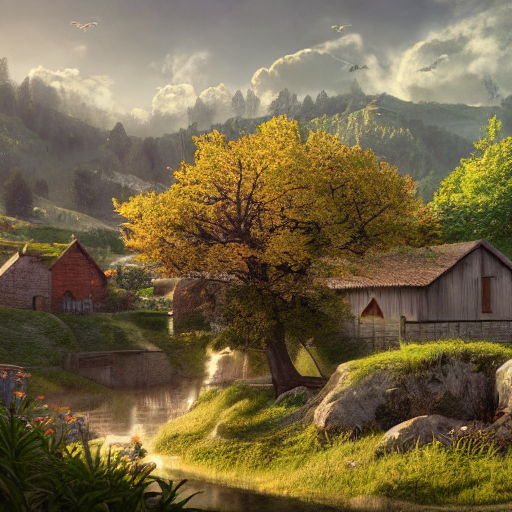

In [6]:
torch.manual_seed(32)
sd_pipe(extended_prompt).images[0]